# Part4: Model training

data is taken from https://www.kaggle.com/c/santander-customer-transaction-prediction

In this challenge, Santander invites Kagglers to help them identify which customers will make a specific transaction in the future, irrespective of the amount of money transacted. The data provided for this competition has the same structure as the real data they have available to solve this problem.

The data is anonimyzed, each row containing 200 numerical values identified just with a number.

In this notebook we train different ML models, which are defined in another notebook

## Load packages

In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Activation, Dropout
from keras.models import Sequential
from keras import regularizers
from keras.constraints import max_norm
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import balanced_accuracy_score

Using TensorFlow backend.


## Load data

In [2]:
X_train = np.load("X_train_resamp_std.npy")
Y_train = np.load("Y_train_resamp.npy")

#X_test = np.load("X_test_std.npy")

print (X_train.shape)
print (Y_train.shape)
#X_test = np.fromfile("X_test_std")

(251818, 200)
(251818,)


In [3]:
#Split into train and validation datasets
X_train_NN ,X_val_NN ,Y_train_NN , Y_val_NN = train_test_split(X_train,Y_train,test_size=0.30,random_state=45)

# Monitoring of training and performance
Plot functions for monitoring of training to exclude underfitting and overfitting

In [4]:
## Plot training & validation loss values
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

## Plot training & validation acc values
def plot_acc(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model acc')
    plt.ylabel('Auc')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    
## Plot training & validation auc values
def plot_auc(history):
    plt.plot(history.history['auc'])
    plt.plot(history.history['val_auc'])
    plt.title('Model auc')
    plt.ylabel('Auc')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

## Load models

In [5]:
%run SantanderCustomerTransactionPrediction.Model_definition.ipynb

## Train models

## DNN

In [6]:
2*4*4*512

16384

In [7]:
model_NN_32 = build_NN_32(X_train_NN)
history_NN_32 = model_NN_32.fit(X_train_NN,Y_train_NN,validation_data = (X_val_NN,Y_val_NN),epochs=100,batch_size=2*4*4*512)

#model_NN_32 = build_NN_64(X_train_NN)
#history_NN_32 = model_NN_32.fit(X_train_NN,Y_train_NN,validation_data = (X_val_NN,Y_val_NN),epochs=100,batch_size=4*8*4*512)
#model_NN_32 = build_NN_128(X_train_NN)
#history_NN_32 = model_NN_32.fit(X_train_NN,Y_train_NN,validation_data = (X_val_NN,Y_val_NN),epochs=100,batch_size=4*2048)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                6432      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 6,977
Trainable params: 6,977
Non-trainable params: 0
_________________________

Epoch 35/100
176272/176272 [==============================] - 1s 4us/step - loss: 0.4473 - acc: 0.8551 - auc: 0.8897 - val_loss: 0.4486 - val_acc: 0.8517 - val_auc: 0.8903
Epoch 36/100
176272/176272 [==============================] - 1s 4us/step - loss: 0.4447 - acc: 0.8562 - auc: 0.8909 - val_loss: 0.4459 - val_acc: 0.8533 - val_auc: 0.8914
Epoch 37/100
176272/176272 [==============================] - 1s 4us/step - loss: 0.4419 - acc: 0.8575 - auc: 0.8919 - val_loss: 0.4432 - val_acc: 0.8543 - val_auc: 0.8925
Epoch 38/100
176272/176272 [==============================] - 1s 4us/step - loss: 0.4389 - acc: 0.8597 - auc: 0.8930 - val_loss: 0.4407 - val_acc: 0.8548 - val_auc: 0.8935
Epoch 39/100
176272/176272 [==============================] - 1s 4us/step - loss: 0.4357 - acc: 0.8601 - auc: 0.8940 - val_loss: 0.4381 - val_acc: 0.8566 - val_auc: 0.8945
Epoch 40/100
176272/176272 [==============================] - 1s 5us/step - loss: 0.4332 - acc: 0.8613 - auc: 0.8951 - val_loss: 0.4359 - va

176272/176272 [==============================] - 1s 4us/step - loss: 0.3819 - acc: 0.8754 - auc: 0.9184 - val_loss: 0.3923 - val_acc: 0.8676 - val_auc: 0.9185
Epoch 83/100
176272/176272 [==============================] - 1s 4us/step - loss: 0.3816 - acc: 0.8751 - auc: 0.9187 - val_loss: 0.3915 - val_acc: 0.8683 - val_auc: 0.9188
Epoch 84/100
176272/176272 [==============================] - 1s 4us/step - loss: 0.3810 - acc: 0.8752 - auc: 0.9190 - val_loss: 0.3909 - val_acc: 0.8680 - val_auc: 0.9191
Epoch 85/100
176272/176272 [==============================] - 1s 4us/step - loss: 0.3805 - acc: 0.8751 - auc: 0.9192 - val_loss: 0.3907 - val_acc: 0.8685 - val_auc: 0.9194
Epoch 86/100
176272/176272 [==============================] - 1s 4us/step - loss: 0.3798 - acc: 0.8761 - auc: 0.9195 - val_loss: 0.3902 - val_acc: 0.8681 - val_auc: 0.9196
Epoch 87/100
176272/176272 [==============================] - 1s 4us/step - loss: 0.3800 - acc: 0.8745 - auc: 0.9198 - val_loss: 0.3896 - val_acc: 0.8680

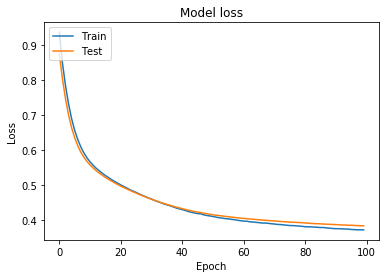

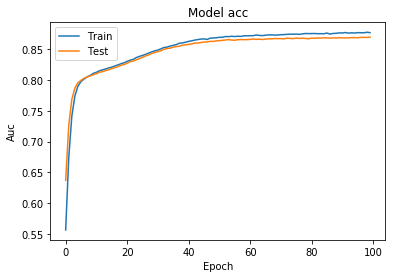

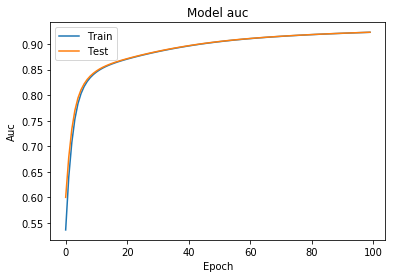

In [8]:
plot_loss(history_NN_32)
plot_acc(history_NN_32)
plot_auc(history_NN_32)

In [9]:
import time
name_ext = str(time.time())
#print(name_ext)

## Save model

In [10]:
# serialize model to JSON
model_NN_32_json = model_NN_32.to_json()
with open("model_NN_32_ts"+name_ext+".json", "w") as json_file:
    json_file.write(model_NN_32_json)
# serialize weights to HDF5
model_NN_32.save_weights("model_NN_32_ts"+name_ext+".h5")
print("Saved model to disk")
print("name_ext = '",name_ext,"'")
#!ls -1t | head -5

Saved model to disk
name_ext = ' 1551991503.568746 '


## Conclusion, observations

 * NN with 32 input layers and batch size 4*512 shows good performance already with 10 epoch (val_acc: 0.8104), which becomes even better for 100 (val_acc: 0.8652) 
